## Observations and Insights 

In [109]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
merged_data = mouse_metadata.merge(study_results,on=["Mouse ID"])




# Display the data table for preview
merged_data.head(50)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [110]:
# Checking the number of mice.
len(merged_data["Mouse ID"].unique())

249

In [111]:
# Getting the duplicate. mice by ID number that shows up for Mouse ID and Timepoint. 
merged_data.duplicated(subset=None, keep='first')
duplicates = pd.DataFrame(merged_data, columns=['Mouse ID', 'Timepoint'])
dup_df = duplicates[duplicates.duplicated(['Mouse ID', 'Timepoint'])]
dup_df


,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [112]:
cleandata = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
len(cleandata["Mouse ID"].unique())

249

In [113]:
cleandata.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary Statistics

In [114]:
tvolume = cleandata["Tumor Volume (mm3)"]
mean = cleandata.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

median = cleandata.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

variance = cleandata.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

stdev = cleandata.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

SEM = cleandata.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_table = pd.DataFrame({"Mean": mean, "Median":median, "Variance":variance, "Standard Deviation": stdev, "SEM": SEM})

summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

sum_table = cleandata.groupby('Drug Regimen')
sum_table2 = sum_table.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
sum_table2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Mice')

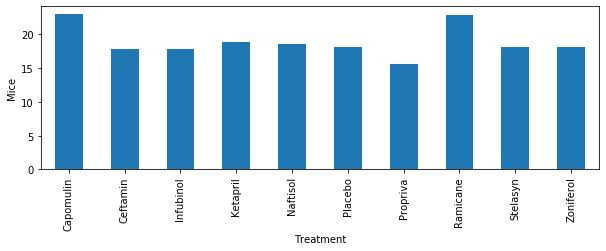

In [115]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_index = cleandata.set_index("Drug Regimen")
drug_df = drug_index.groupby(["Drug Regimen"])

mouse_df = drug_df["Mouse ID"]
mouse_count = (drug_df["Mouse ID"].count())/10

pandaplot = mouse_count.plot(kind="bar", figsize = (10,3))

pandaplot.set_xlabel("Treatment")
pandaplot.set_ylabel("Mice")


In [116]:
treatment_type = cleandata["Drug Regimen"].unique()
treatment_type

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

Text(0, 0.5, 'Number of Mice')

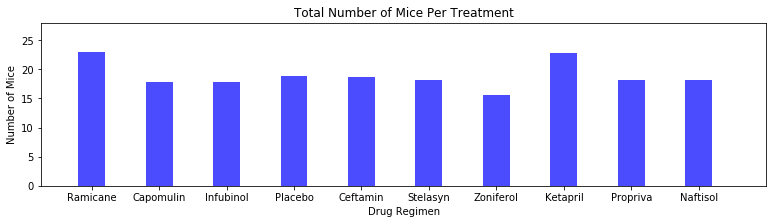

In [117]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



x_axis = np.arange(len(mouse_count))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(13,3))
plt.bar(x_axis, mouse_count, color='b', alpha=.7, align="center", width=0.4)
plt.xticks(tick_locations, treatment_type, rotation=0)

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(mouse_count)+5)

plt.title("Total Number of Mice Per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

In [118]:
gender_count

,Gender Distribution
Sex,
Female,124
Male,125


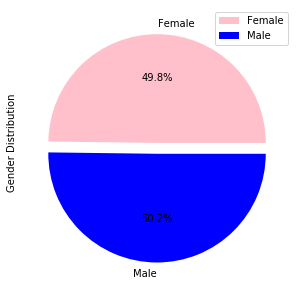

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gender = cleandata.groupby(['Mouse ID','Sex'])

gender_df = pd.DataFrame(mouse_gender.size())
 
gender_count = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender_count.columns = ["Gender Distribution"]

colors = ['Pink', 'Blue']
plot = gender_count.plot.pie(y='Gender Distribution', autopct='%1.1f%%',explode=(0,0.1), figsize = (5,5), colors = colors)

([<matplotlib.patches.Wedge at 0x7ff339384750>,
 [Text(-0.7655308193487089, -0.9241009493704108, 'Male'),
  Text(0.7017365844029833, 0.8470925369228766, 'Female')],
 [Text(-0.44655964462008013, -0.5390588871327395, '50.2%'),
  Text(0.38276540967435446, 0.4620504746852053, '49.8%')])

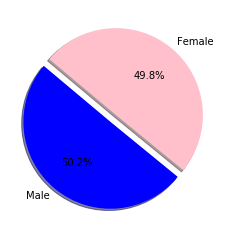

In [120]:
labels = ['Male', 'Female']
sizes = [125,124]
colors = ['Blue', 'Pink']
explode = (0.1,0)

matplot = plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 140)

matplot

## Quartiles, Outliers and Boxplots

In [121]:
newdata = cleandata.rename(columns = {'Drug Regimen':'Drug_Regimen',
                                     'Tumor Volume (mm3)' : 'Tumor_Volume'})

drugs = newdata[(newdata.Drug_Regimen.isin(["Capomulin","Ramicane","Infubino","Ceftamin"]))]

mouse = drugs.groupby('Mouse ID')['Timepoint'].max()

mouse_merged = cleandata.merge(mouse,  on =['Mouse ID', 'Timepoint'])
mouse_merged


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
70,x226,Ceftamin,Male,23,28,0,45.000000,0
71,x581,Ceftamin,Female,19,28,45,64.634949,3
72,x822,Ceftamin,Male,3,29,45,61.386660,3
73,y769,Ceftamin,Female,6,27,45,68.594745,4


In [122]:
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor = []

for drug in drugs:
    drug1 = cleandata.loc[cleandata['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    tumor.append(drug1)

    quartiles = drug1.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = drug1.loc[(drug1 < lower_bound) | (drug1 > upper_bound)]
    
    print(outliers)



18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)


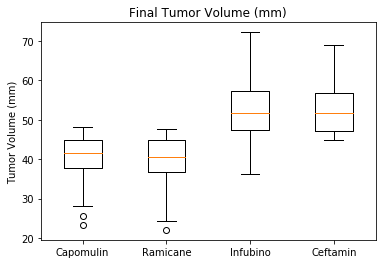

In [123]:

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, tumorplot = plt.subplots()
tumorplot.set_title('Final Tumor Volume (mm)')
tumorplot.set_ylabel('Tumor Volume (mm)')
tumorplot.set_xticklabels(["Capomulin","Ramicane","Infubino","Ceftamin"])
tumorplot.boxplot(tumor)
plt.show()

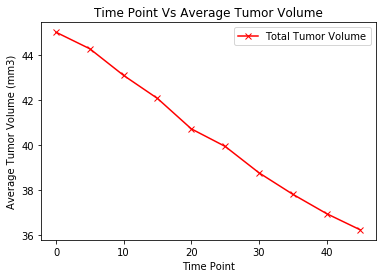

In [124]:
###LINE AND SCATTER PLOTS


tumorgrowth = cleandata[(cleandata["Drug Regimen"] == "Capomulin") & (cleandata["Mouse ID"])]
tumorgrowth = tumorgrowth.groupby(["Drug Regimen", "Timepoint"])
tumorgrowth_df = tumorgrowth["Tumor Volume (mm3)"].mean().to_frame()
tumor_index = tumorgrowth_df.unstack(0)
tumor_plot = tumor_index["Tumor Volume (mm3)"]

xaxis = [0,5,10,15,20,25,30,35,40,45]
plt.figure()
tumorTotal, = plt.plot(xaxis, tumor_plot["Capomulin"], marker= "x", color="red", label="Total Tumor Volume" )
plt.legend(handles=[tumorTotal], loc="best")
plt.title("Time Point Vs Average Tumor Volume")

plt.xlabel("Time Point")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


<Figure size 432x288 with 0 Axes>

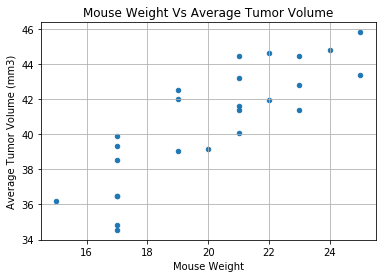

In [125]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

scatter_data = cleandata[(cleandata["Drug Regimen"]=="Capomulin")]
scatter_data = scatter_data[['Mouse ID', 'Weight (g)', "Tumor Volume (mm3)"]]
mouse_weight = scatter_data.groupby(['Mouse ID', 'Weight (g)'])
scatter_df = mouse_weight['Tumor Volume (mm3)'].mean().to_frame()
scatter_df = scatter_df.reset_index()

plt.figure()
scatter_df.plot(x = 'Weight (g)', y='Tumor Volume (mm3)', kind = 'scatter', marker = 'o')

plt.title('Mouse Weight Vs Average Tumor Volume')
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)

plt.show()

## Correlation and Regression

In [126]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df

,Mouse ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume,Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


The correlation between both factors is 0.53


<Figure size 432x288 with 0 Axes>

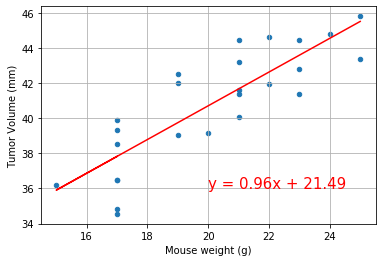

In [128]:
capomulin_df = newdata[(newdata.Drug_Regimen.isin(["Capomulin"]))]




weight= capomulin_df.iloc[:,4]
tumor_vol = capomulin_df.iloc[:,6]
correlation = st.pearsonr(weight,tumor_vol)


scatter_data = cleandata[(cleandata["Drug Regimen"]=="Capomulin")]
scatter_data = scatter_data[['Mouse ID', 'Weight (g)', "Tumor Volume (mm3)"]]
mouse_weight = scatter_data.groupby(['Mouse ID', 'Weight (g)'])
scatter_df = mouse_weight['Tumor Volume (mm3)'].mean().to_frame()
scatter_df = scatter_df.reset_index()

plt.figure()

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
scatter_df.plot(x = 'Weight (g)', y='Tumor Volume (mm3)', kind = 'scatter', marker = 'o')
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.grid(True)

plt.xlabel('Mouse weight (g)')
plt.ylabel('Tumor Volume (mm)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()